In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install tensorflow_text

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.5/6.5 MB 19.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 84.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 100.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 42.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard
    Fo

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/DataSets/datasets/spam.csv')
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
df.groupby('Category').describe()

Message                                                            \
           count unique                                                top   
Category                                                                     
ham         4825   4516                             Sorry, I'll call later   
spam         747    641  Please call our customer service representativ...   

               
         freq  
Category       
ham        30  
spam        4

In [ ]:
df['Category'].value_counts()

ham     4825
spam     747
Name: Category, dtype: int64

In [ ]:
747/4825

0.15481865284974095

In [ ]:
# As it is appearent that the dataset is imbalanced therefore we will be handling it by downsampling the majority class

df_spam = df[df['Category']=='spam']
df_spam.shape

(747, 2)

In [ ]:
df_ham = df[df['Category']=='ham']
df_ham.shape

(4825, 2)

In [ ]:
df_ham_downsampled = df_ham.sample(df_spam.shape[0])
df_ham_downsampled.shape

(747, 2)

In [ ]:
df_balanced = pd.concat([df_spam, df_ham_downsampled ])
df_balanced['Category'].value_counts()

spam    747
ham     747
Name: Category, dtype: int64

In [ ]:
# Creating a new column and applying transformation on 'Category" column and storing its values on spam column where 1 represents that there is spam and 0 represents that there is no spam
df_balanced['spam'] = df_balanced['Category'].apply(lambda x:1 if x == 'spam' else 0)
df_balanced.sample(5)

,Category,Message,spam
3961,ham,I sent lanre fakeye's Eckankar details to the ...,0
636,ham,Me n him so funny...,0
3829,ham,Where are you ? What are you doing ? Are yuou ...,0
3223,ham,"Hi, my love! How goes that day? Fuck, this mor...",0
4350,ham,Ü bot notes oredi... Cos i juz rem i got...,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Using stratify argument to ensure that there is equal distribution of column 'spam' values in train and test DS.
X_train, X_test, Y_train, Y_test = train_test_split(df_balanced['Message'], df_balanced['spam'], stratify = df_balanced['spam'])

In [ ]:
X_train.head(5)

4702                               I liked the new mobile
5314    Get the official ENGLAND poly ringtone or colo...
3988    Ringtone Club: Gr8 new polys direct to your mo...
1663    Hi if ur lookin 4 saucy daytime fun wiv busty ...
1765    Hi 07734396839 IBH Customer Loyalty Offer: The...
Name: Message, dtype: object

In [ ]:
Y_train.head(5)

4702    0
5314    1
3988    1
1663    1
1765    1
Name: spam, dtype: int64

In [ ]:
len(Y_train)

1120

In [ ]:
encoder_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
preprocessor_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3'

In [ ]:
bert_preprocess_model = hub.KerasLayer(preprocessor_url)
bert_model = hub.KerasLayer(encoder_url)

In [ ]:
def get_sentence_embeddings(sentences):
  preprocessed_text = bert_preprocess_model(sentences)
  return bert_model(preprocessed_text)['pooled_output']

get_sentence_embeddings(['Hello', 'My name is Yousaf', "I'm a Pakistani National"])

<tf.Tensor: shape=(3, 768), dtype=float32, numpy=
array([[-0.77235746, -0.16994876,  0.32714057, ...,  0.44123664,
        -0.5151341 ,  0.844271  ],
       [-0.77411807, -0.35880265,  0.01271498, ..., -0.37546706,
        -0.6713388 ,  0.8659638 ],
       [-0.85112333, -0.48193637, -0.40494713, ..., -0.5334982 ,
        -0.5712671 ,  0.8541191 ]], dtype=float32)>

In [ ]:
# COsine similarity can be used to determine the similarities between embeddings
#  E.g:
e = get_sentence_embeddings(['Shahid Afridi',
                             'Buggati',
                             'Truck',
                             'Horse',
                             'Hen',
                             'Babar Azam',
                             'Rocket'])

In [ ]:
# higher value indicated that the angle is closer
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[4]],[e[6]])

array([[0.9669769]], dtype=float32)

In [ ]:
#  BERT layers
#  this layer will derive the input shape value on its own, depending on the size of input text
text_input = tf.keras.layers.Input(shape = (), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess_model(text_input)
outputs = bert_model(preprocessed_text)

# Neural network layers
l1 = tf.keras.layers.Dropout(0.1, name = 'Dropout')(outputs['pooled_output'])
l2 = tf.keras.layers.Dense(1, activation='sigmoid', name = 'output')(l1)

# Construction Neural Network using these layers
model = tf.keras.Model(inputs = [text_input], outputs=[l2])


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 text (InputLayer)           [(None,)]                    0         []                            
                                                                                                  
 keras_layer (KerasLayer)    {'input_mask': (None, 128)   0         ['text[0][0]']                
                             , 'input_type_ids': (None,                                           
                              128),                                                               
                              'input_word_ids': (None,                                            
                             128)}                                                                
                                                                                              

In [ ]:
METRICS = [
    tf.keras.metrics.BinaryAccuracy(name = 'accuracy'),
    tf.keras.metrics.Precision(name = 'precision'),
    tf.keras.metrics.Recall(name = 'recall')
]

model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = METRICS

)

In [ ]:
model.fit(X_train, Y_train, epochs = 10)

Epoch 1/10
35/35 [==============================] - 23s 349ms/step - loss: 0.6632 - accuracy: 0.6080 - precision: 0.6086 - recall: 0.6054
Epoch 2/10
35/35 [==============================] - 12s 342ms/step - loss: 0.5309 - accuracy: 0.7929 - precision: 0.7761 - recall: 0.8232
Epoch 3/10
35/35 [==============================] - 12s 331ms/step - loss: 0.4575 - accuracy: 0.8339 - precision: 0.8213 - recall: 0.8536
Epoch 4/10
35/35 [==============================] - 12s 351ms/step - loss: 0.4062 - accuracy: 0.8732 - precision: 0.8667 - recall: 0.8821
Epoch 5/10
35/35 [==============================] - 12s 354ms/step - loss: 0.3740 - accuracy: 0.8830 - precision: 0.8692 - recall: 0.9018
Epoch 6/10
35/35 [==============================] - 12s 344ms/step - loss: 0.3460 - accuracy: 0.8866 - precision: 0.8859 - recall: 0.8875
Epoch 7/10
35/35 [==============================] - 12s 350ms/step - loss: 0.3320 - accuracy: 0.8920 - precision: 0.8752 - recall: 0.9143
Epoch 8/10
35/35 [================

In [ ]:
model.evaluate(X_test, Y_test)

12/12 [==============================] - 5s 326ms/step - loss: 0.2707 - accuracy: 0.9091 - precision: 0.8923 - recall: 0.9305


[0.270733118057251, 0.9090909361839294, 0.892307698726654, 0.9304812550544739]

In [ ]:
Y_predicted = model.predict(X_test)
Y_predicted = Y_predicted.flatten()

12/12 [==============================] - 5s 362ms/step


In [ ]:
import numpy as np
#  converting fractional values into either 0 or 1

# This line states that if any value for Y_predicted is greater than 0.5, convert it into 1 else convert it into 0.
Y_predicted = np.where(Y_predicted > 0.50, 1, 0)

Y_predicted

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(Y_test, Y_predicted)
cm

array([[166,  21],
       [ 13, 174]])

Text(50.722222222222214, 0.5, 'Ground Truth')

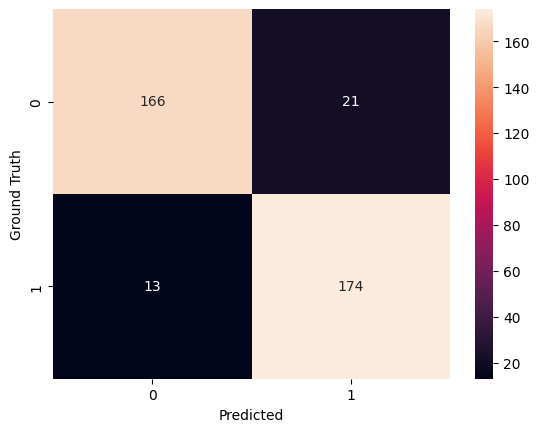

In [ ]:
# using matplotlib and seaborn library to better visualize the confusion matrix

from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm , annot=True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Ground Truth')

In [ ]:
print(classification_report(Y_test, Y_predicted))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       187
           1       0.89      0.93      0.91       187

    accuracy                           0.91       374
   macro avg       0.91      0.91      0.91       374
weighted avg       0.91      0.91      0.91       374



# **Inference**

In [ ]:
mails = ['Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hi there. How are you?',
    'You have won a brand new car. For further details, follow the instructions provided in the link below',
    "Why don't you wait 'til at least wednesday to see if you get your ."]

model.predict(mails)

1/1 [==============================] - 0s 88ms/step


array([[0.79229254],
       [0.84680647],
       [0.8103059 ],
       [0.05503847],
       [0.78247744],
       [0.11431896]], dtype=float32)